In [1]:
!pip install scikit-learn
!pip install imbalanced-learn
!pip install imblearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
listAirline = df['airline'].unique()
listAirline

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [5]:
listSentiment = df['airline_sentiment'].unique()
listSentiment

array(['neutral', 'positive', 'negative'], dtype=object)

In [6]:
sentiment_details = df['airline_sentiment'].value_counts()

In [7]:
idx = sentiment_details.index
idx[0]

'negative'

In [8]:
sentiment_details.values

array([9178, 3099, 2363])

In [9]:
def plot(x, y, x_lable, y_label):
    plt.bar( x, y, color=['blue','Green','red', 'brown', 'olive'],
            width = 0.4)
    plt.xlabel(x_lable)
    plt.ylabel(y_label)
    plt.show()

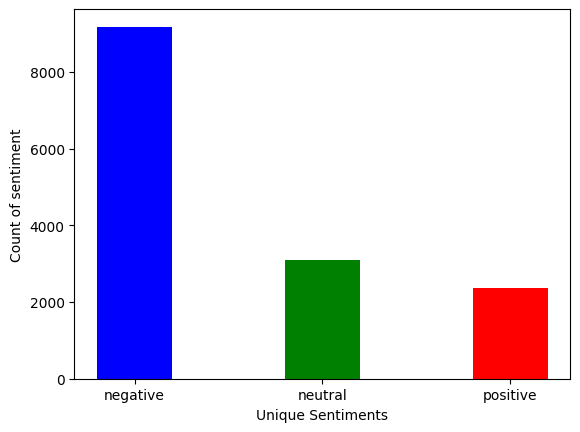

In [10]:
plot(sentiment_details.index, sentiment_details.values, "Unique Sentiments", "Count of sentiment")

In [11]:
df_companies = df[['airline_sentiment', 'airline']]
df_companies

,airline_sentiment,airline
0,neutral,Virgin America
1,positive,Virgin America
2,neutral,Virgin America
3,negative,Virgin America
4,negative,Virgin America
...,...,...
14635,positive,American
14636,negative,American
14637,neutral,American
14638,negative,American


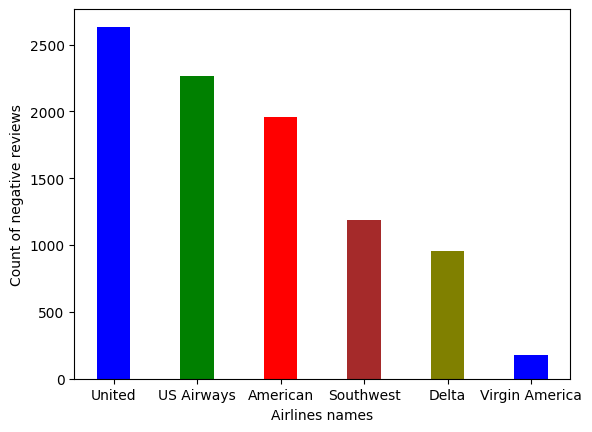

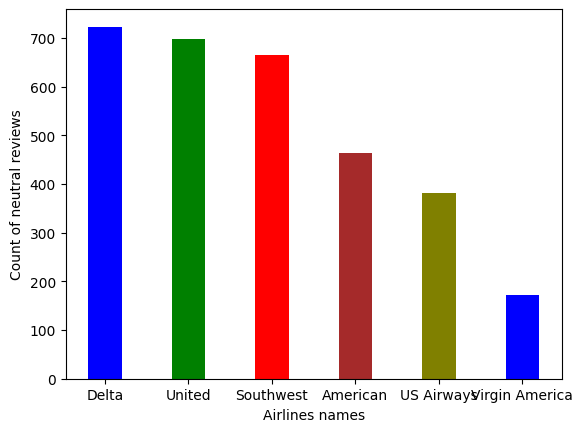

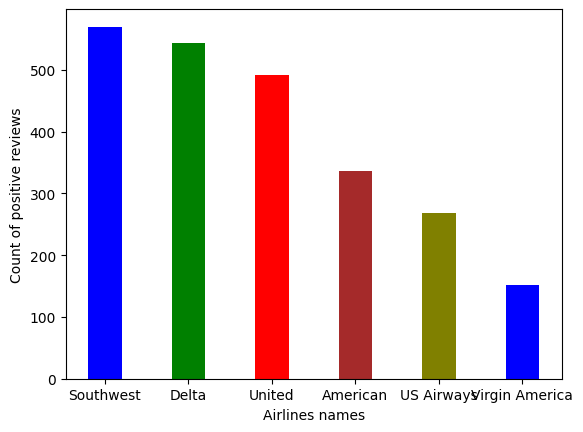

In [12]:
for x in sentiment_details.index:
    airline_review = df_companies[df_companies.airline_sentiment == x]['airline'].value_counts()
    plot(airline_review.index, airline_review.values, "Airlines names", "Count of "+x+" reviews")

In [13]:
# Preprocessing

In [14]:
df = df[df.airline_sentiment_confidence > 0.7]
airline_df = df[['airline_sentiment', 'text']]
airline_df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
9,positive,"@VirginAmerica it was amazing, and arrived an ..."
...,...,...
14631,negative,@AmericanAir thx for nothing on getting us out...
14633,negative,@AmericanAir my flight was Cancelled Flightled...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...


In [15]:
# Word Cloud

In [16]:
def plotWordCloud(t):
    words = ' '.join(l for l in  df[df['airline_sentiment']==t].text)
    filtered_words = " ".join([word for word in words.split()
                                if not word.startswith('@') and not word.startswith('http://')
                                ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=2500
                         ).generate(filtered_words)
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

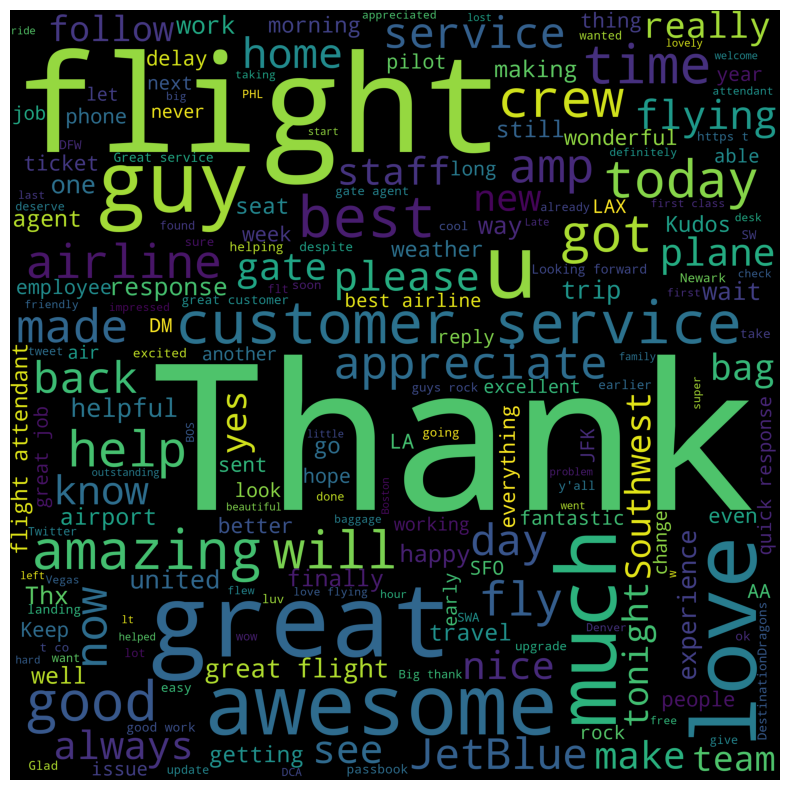

In [17]:
# Positive
plotWordCloud('positive')

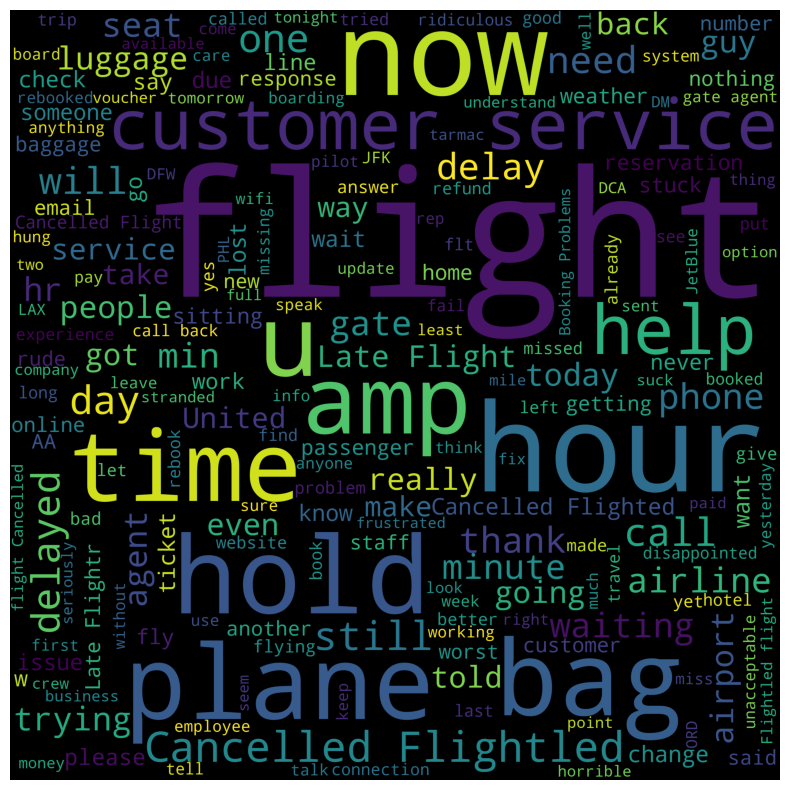

In [18]:
# Negative
plotWordCloud('negative')

In [19]:
# Encoding
y = pd.factorize(airline_df['airline_sentiment']) 
y

(array([0, 1, 1, ..., 1, 0, 1]),
 Index(['neutral', 'negative', 'positive'], dtype='object'))

In [20]:
# load data
X = airline_df['text']
tf_idf_features = TfidfVectorizer()
X = tf_idf_features.fit_transform(X)
print(X[0])

  (0, 9665)	0.4326189761894123
  (0, 3954)	0.7682167910584247
  (0, 12094)	0.31014240570373325
  (0, 11872)	0.3556620187214576


In [21]:
smote = SMOTE()
X, y = smote.fit_resample(X, y[0])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [23]:
# SVC

In [24]:
model = SVC(class_weight='balanced', C=1,gamma='scale', kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
accuracy_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred,average='weighted')

In [26]:
accuracy_score

0.9670936395759717

In [27]:
f1

0.9671904410391737

In [28]:
# Encoding
test_case =  tf_idf_features.transform(['flying with @united is always a great experience'])

In [29]:
model.predict(test_case)

array([2])